# Assignment 6


### Task 1

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$

$$
\nabla f = \left( 2x_1 + 2x_2^2, 4x_1x_2 + 4x_2^3 \right) = \left( 2, 0 \right)
$$

$$p \cdot \nabla f = -2 < 0$$

$$f(x + \alpha p) = f(x_1 - \alpha, x_2 + \alpha) = \left(x_1 - \alpha + (x_2 + \alpha)^2\right)^2$$

$$f(x+\alpha p) = (x_1 - \alpha + x_2^2 + 2\alpha x_2 + \alpha^2)^2$$

$$f(x + \alpha p) = (1 - \alpha + \alpha^2)^2$$

$$f(x + \alpha p) = (1 - \alpha + \alpha^2)^2$$

$$-1 + 2\alpha = 0 \rightarrow \alpha = 0.5$$

### Task 2

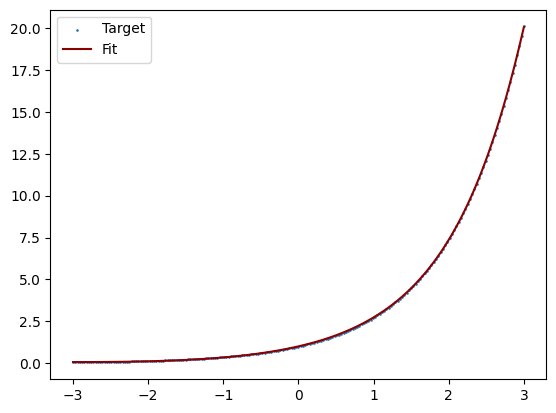

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from scipy import optimize

k = 201
X = np.linspace(-3, 3, k)
Y = np.exp(X)

def f(x, a):
    return (a[0] + a[1] * x + a[2] * x**2) / (1 + a[3] * x + a[4] * x**2)

def loss(a):
    P = 50
    return jnp.sum((f(X, a) - Y)**P) ** (1/P)

a0 = np.random.normal(size=5)
res = optimize.minimize(
    loss,
    a0,   
    jac  = jax.grad(loss),
    method = 'BFGS'
)
plt.scatter(X, Y, s=0.8, label='Target')
plt.plot(X, f(X, res.x), color='darkred', label="Fit")
plt.legend()

### Task 4

In [36]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import norm

def rayleigh_quotient(u, A):
    return np.dot(u, A @ u)

def constraint(u):
    return norm(u) - 1

def deflate(A, u):
    return A - np.outer(u, u) * A @ u

u0 = np.random.rand(A.shape[0])
u0 /= norm(u0)

A = np.random.rand(3, 3)
A = (A + A.T) / 2

constraints = {'type': 'eq', 'fun': constraint}
result1 = minimize(rayleigh_quotient, u0, args=(A,), constraints=constraints)
eigvec1 = result1.x

A_deflated = deflate(A, eigvec1)


result2 = minimize(rayleigh_quotient, u0, args=(A_deflated,), constraints=constraints)
eigvec2 = result2.x

eigval1 = np.dot(eigvec1, np.dot(A, eigvec1))
eigval2 = np.dot(eigvec2, np.dot(A, eigvec2))

print("Eigenvalue 1:", eigval1)
print("Eigenvalue 2:", eigval2)

Eigenvalue 1: -0.2190681593089237
Eigenvalue 2: -0.1257196926508562


### Task 6

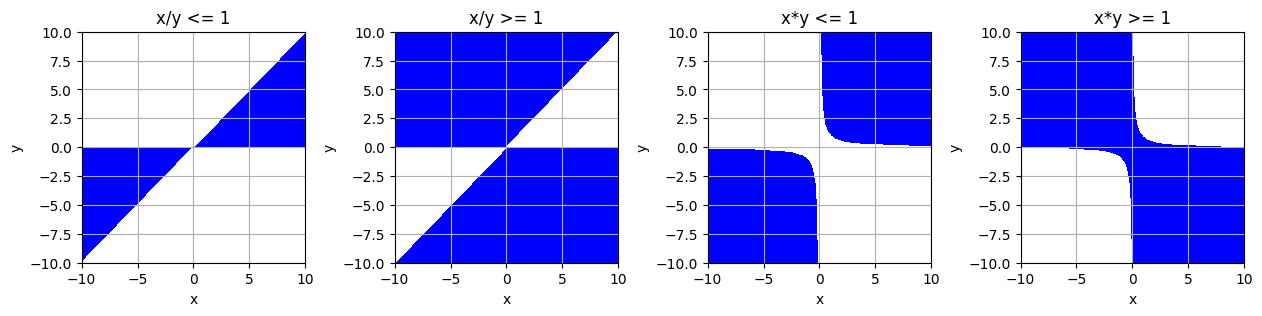

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

X, Y = np.meshgrid(x, y)

mask = X >= 0

conditions = [X / Y <= 1, X / Y >= 1, X*Y <= 1, X*Y >= 1]
titles = ["x/y <= 1", "x/y >= 1", "x*y <= 1", "x*y >= 1"]

fig, axis = plt.subplots(1,4)
fig.set_size_inches(15,3)
for ax, cond, title in zip(axis, conditions, titles):
    ax.contourf(X, Y, cond, levels=[-0.5, 0.5, 1.5], colors=['blue', 'white'])
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
plt.subplots_adjust(wspace=0.4) 
plt.show()

Как видно, на всех графиках кроме последнего, на множестве, определенном в $R_{++}^2$, можно нарисовать отрезок, соединяющий 2 точки множества, у которого все точки не принадлежат исходным множествам. Значит 4ое множество не выпуклое.

### Task 7

#### 1.

Функция считается выпуклой если её Гессиан больше нуля. 

$$\nabla^2 f = \left( \begin{matrix} \frac{2}{y} & \frac{-2x}{y^2}  \\ \frac{-2x}{y^2} & \frac{2x^2}{y^{3}}  \end{matrix} \right)$$

По критерию Сильвестра если: $ \frac{2}{y} > 0 $ и $ \frac{2x^2}{y^{3}} > 0 $ тогда гессиан положительно определен. Что очевидно на области $ y > 0$ 

#### 2.

$$\frac{\partial^2 f}{\partial x_i\partial x_j} = \left(\prod_{i=1}^{n}x_i\right)^{\frac{1}{n}}\left[\frac{1}{n^2}\frac{1}{x_{i}x_{j}} - \frac{1}{n}\frac{1}{x_{j}^2} \right] $$
$$\sum_{i=1}^nv_{i}v_{j}\frac{\partial^2 f}{\partial x_i\partial x_j} = \frac{1}{n^2}\left(\prod_{i=1}^{n}x_i\right)^{\frac{1}{n}} 
\left[\sum_{j=1}^n\frac{v_{j}}{x_{j}}\sum_{i=1}^n\frac{v_{i}}{x_{i}} - n\sum_{j=1}^n\frac{v_{i}^2}{x_{j}^2} \right] \le 0$$
$$\sum_{j=1}^n\frac{v_{j}}{x_{j}}\sum_{i=1}^n\frac{v_{i}}{x_{i}} \le n\sum_{j=1}^n\frac{v_{i}^2}{x_{j}^2}$$
Воспользуемся неравенством Коши-Буняковского
$$ \left(\sum_{j=1}^n\frac{v_{j}}{x_{j}}\right)^2 = \left(\sum_{j=1}^n\frac{v_{j}}{x_{j}}1\right)^2 = 
{\langle a, b \rangle}^2 \le {||a||}^2{||b||}^2 =
 \sum_{j=1}^n\frac{v_{j}^2}{x_{j}^2}\sum_{j=1}^n1^2 = n\sum_{j=1}^n\frac{v_{i}^2}{x_{j}^2}$$

#### 3.

$$\nabla^2 f = \frac{1}{\vec 1 \cdot \xi} \text{diag} (\xi) - \frac{1}{\left(\vec 1 \cdot \xi\right)^2} \xi\xi^T,$$
$$ \xi = (e^{x_{1}}, e^{x_{2}},...,e^{x_{n}})$$

Для выпуклости необходимо показать, что $\forall v$: $v^T \nabla^2 f(x) v \ge 0$

$$\forall v: v^T \nabla^2 f(x) v = \frac{1}{\left(\vec 1 \cdot \xi\right)^2}\left[\sum_{i=1}^n\xi_{i}\sum_{i=1}^n{v_{i}}^2\xi_{i} - \sum_{i=1}^n{v_{i}}^2\xi_{i}^2\right] \ge 0 $$

Это выражение удовлетворяет неравенству Коши-Буняковского $ {\langle a^T, b \rangle}^2 \le (a^Ta)(b^Tb) $ для векторов  $a_{i} = v_{i}\sqrt z_{i}, b_{i} = \sqrt z_{i}.$

### Task 8

#### 1.

Для этой задачи достаточно показать, числитель и знаменатель выпуклы, тогда полное выражение тоже будет выпукло.

$$ \frac {\partial^2}{\partial x^2} ||Ax-b||_{2}^2 = 2A^TA > 0 $$

$1-x^Tx$ на множестве $\{x | ||x||_{2} < 1\}$ выпукла

### Task 10

/home/vasily/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


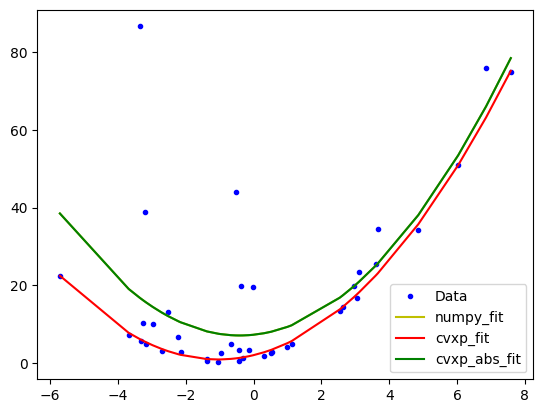

In [55]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def eq(x, coeffs):
    return coeffs[0]*x**2+coeffs[1]*x+coeffs[2]

def numpy_lsq(x, y):
    A = np.vstack([x**2, x, np.ones(len(x))]).T
    a = np.linalg.lstsq(A, y, rcond=None)[0]
    return eq(x, a)

def cvxp_lsq(x, y):
    a = cp.Variable()
    b = cp.Variable()
    c = cp.Variable()
    objective = cp.Minimize(cp.sum_squares(a * x**2 + b*x + c - y))
    problem = cp.Problem(objective)
    problem.solve()
    return eq(x, (a.value, b.value, c.value))

def cvxp_abs(x, y):
    a = cp.Variable()
    b = cp.Variable()
    c = cp.Variable()
    objective = cp.Minimize(cp.sum(cp.abs(a * x**2 + b*x + c - y)))
    problem = cp.Problem(objective)
    problem.solve()
    return eq(x, (a.value, b.value, c.value))

data = np.load('data_fit.npz')
x = data['x']
y = data['y']
data.close()

np_fit = numpy_lsq(x,y)
cvxp_fit = cvxp_lsq(x,y)
cvxp_abs_fit = cvxp_abs(x,y)

plt.plot(x, y, 'b.', label="Data")
plt.plot(x, np_fit, 'y', label="numpy_fit")
plt.plot(x, cvxp_abs_fit, 'r', label="cvxp_fit")
plt.plot(x, cvxp_fit, 'g', label="cvxp_abs_fit")
plt.legend()



В данном наборе данных есть много выбросов, которые влияют на общий фит. Влияние больше в случае использования квадрата разности. Таким образом вторая модель лучше оценивает данные.

### Task 11

In [56]:
import numpy as np
from scipy.optimize import linprog

data = np.load('data_linprog.npz')
X = data['X']
y = data['y']

c = np.ones(X.shape[1])

A_eq = X
b_eq = y

bounds = [(0, None)]  * X.shape[1]

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

print(f"Nums of none zero: {np.count_nonzero(res.x)}")

Nums of none zero: 10


### Task 12

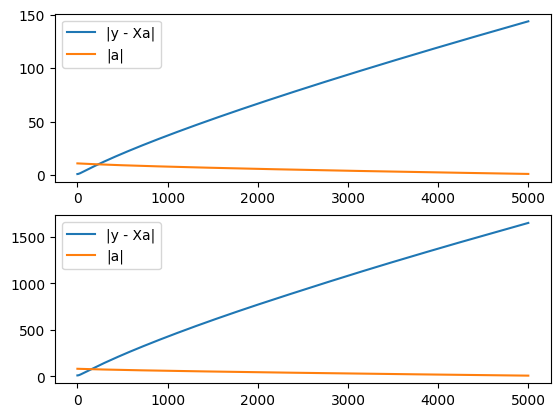

In [57]:
import cvxpy as cp
import numpy as np

ex7_data_path = 'data_regr.npz'
ex7_data = np.load(ex7_data_path)

X = ex7_data['X']
y = ex7_data['y']

n = y.shape[0]
k = X.shape[1]

def solve(l):
    a = cp.Variable(k)
    loss = cp.sum((y - X @ a)**2) + l * cp.norm(a, 2)
    objective = cp.Minimize(loss)
    problem = cp.Problem(objective, None)
    return problem.solve(), a.value

ls = np.linspace(0, 5000, 500)
rs2 = np.zeros(ls.shape)
an2 = np.zeros(ls.shape)

rs1 = np.zeros(ls.shape)
an1 = np.zeros(ls.shape)

for i in range(ls.shape[0]):
    print(f"{i=}", end='\r')
    _, a1 = solve(ls[i])
    rs2[i] = np.linalg.norm(y - X @ a1)
    an2[i] = np.linalg.norm(a1)
    rs1[i] = np.linalg.norm(y - X @ a1, 1)
    an1[i] = np.linalg.norm(a1, 1)

fig, ax = plt.subplots(2)
ax[0].plot(ls, rs2, label='|y - Xa|')
ax[0].plot(ls, an2, label='|a|')
ax[0].legend()

ax[1].plot(ls, rs1, label='|y - Xa|')
ax[1].plot(ls, an1, label='|a|')
ax[1].legend()
